# Homework 6 

## 6.1 Training Data
Create a sample of P = 120 training patterns

In [2]:
% matplotlib inline

import numpy as np
import scipy as sp
import math
import scipy.stats as scp
from numpy import linalg as la
from numpy import random as rand
from matplotlib import pyplot as plt

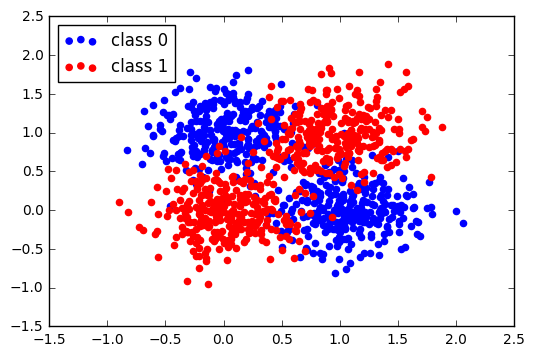

In [7]:
N = 1100
n = N/2
n1 = (np.sign(rand.uniform(-1, 1, n))==1).sum()
n2 = (np.sign(rand.uniform(-1, 1, n))==1).sum()

X_c1 = np.append(rand.multivariate_normal([0,1], [[0.1, 0], [0, 0.1]], n1), rand.multivariate_normal([1,0], [[0.1, 0], [0, 0.1]], n-n1), axis=0)
X_c2 = np.append(rand.multivariate_normal([0,0], [[0.1, 0], [0, 0.1]], n2), rand.multivariate_normal([1,1], [[0.1, 0], [0, 0.1]], n-n2), axis=0)
# create a data matrix of shape 120x3 where colums 0 and 1 are the dimensions and colum 2 being the label
p = np.vstack((X_c1, X_c2))
p = np.transpose(p)
#print p.shape
y = np.vstack((np.zeros((n,1)), np.ones((n,1))))

#print y
p1 = plt.scatter(X_c1[:,0], X_c1[:,1], color='blue', label='class 0')
p2 = plt.scatter(X_c2[:,0], X_c2[:,1], color='red', label='class 1')

plt.legend(loc='upper left');
plt.show()

## k Nearest Neighbours

In [17]:
def kNN(X, y, x, k=5):
    """returns the assigned class of x. data is samples x (dimension + labels)"""
    # calculate distance of point x to all other points
    X = np.transpose(X)
    
    D = la.norm(x-X, 2, 1)
    # select k nearest vectors
    knn = np.argsort(D)[:k:]
    # compute wich class is represented more often in the knearest
    y_target = np.sign((y[knn,0]).sum())
    return y_target

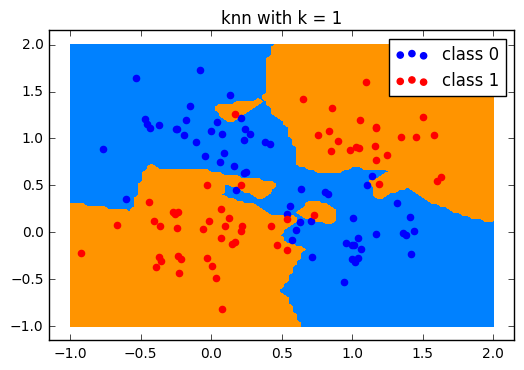

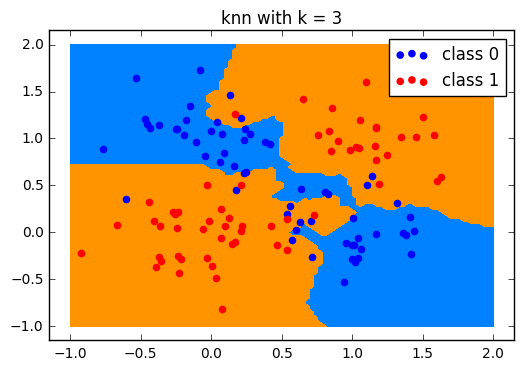

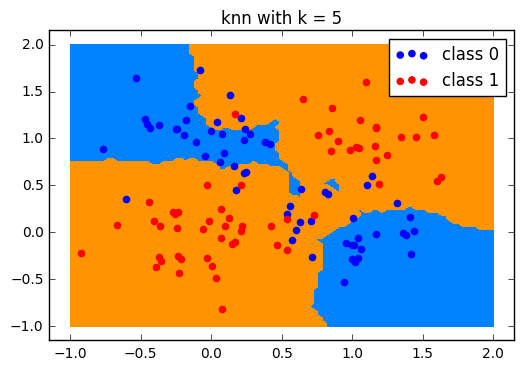

In [18]:
## PLOT 
# create a grid for the contour plot
grid_size = 100
ran = np.linspace(-1.0, 2.0, grid_size)
GX, GY = np.meshgrid(ran, ran)
classes = np.zeros((grid_size, grid_size, 3))

K = [1,3,5]

for i, k in enumerate(K):
    # go through grid and compute the assigned class
    for gx in range(grid_size):
        for gy in range(grid_size):
            classes[gx,gy,i] = kNN(p, y, [ran[gx], ran[gy]], k)
           
    # plot the assigned classes and train data for the whole grid
    plt.title('knn with k = {}'.format(k))
    plt.contourf(GX, GY, classes[:,:,i].T, levels=[-1.0,0.,1.0])
    p1 = plt.scatter(X_c1[:,0], X_c1[:,1], color='blue', label='class 0')
    p2 = plt.scatter(X_c2[:,0], X_c2[:,1], color='red', label='class 1')
    plt.legend(handles=[p1, p2])
    plt.show()


## Parzen Window

In [19]:
def parzen_window(X, y, x, sigma):
    y[y==0] = -1

    factor = -(1 / (2*sigma))
    X= X.T
    D = la.norm(x-X, 2, 1)
    vote = np.exp(factor*D)
    final = np.multiply(vote,y[:,0])
    
    return np.sign(final.sum())
    

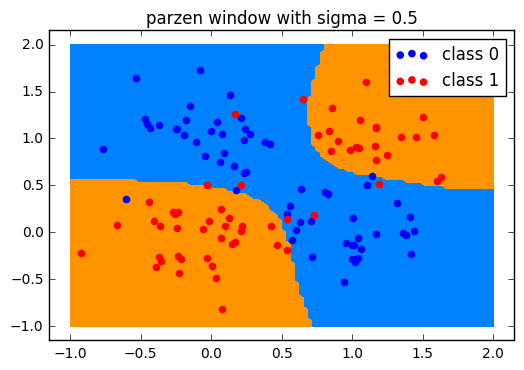

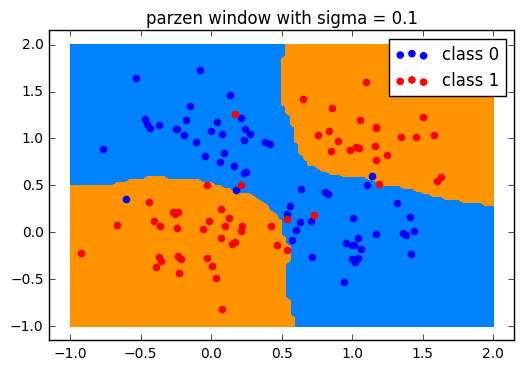

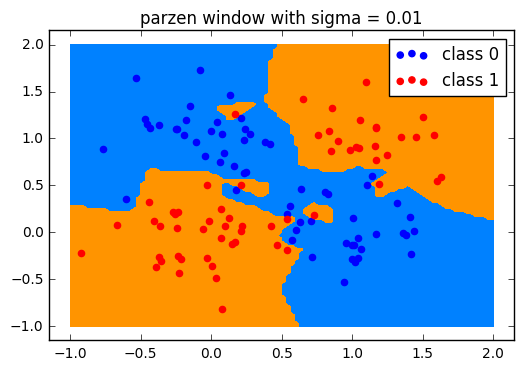

In [20]:
# create a grid for the contour plot
grid_size = 100
ran = np.linspace(-1.0, 2.0, grid_size)
GX, GY = np.meshgrid(ran, ran)
classes = np.zeros((grid_size, grid_size, 3))

K = [0.5,0.1,0.01]

for i, k in enumerate(K):
    # go through grid and compute the assigned class
    for gx in range(grid_size):
        for gy in range(grid_size):
            classes[gx,gy,i] = parzen_window(p, y, [ran[gx], ran[gy]], k)
           
    # plot the assigned classes and train data for the whole grid
    plt.title('parzen window with sigma = {}'.format(k))
    plt.contourf(GX, GY, classes[:,:,i].T, levels=[-1.0,0.,1.0])
    p1 = plt.scatter(X_c1[:,0], X_c1[:,1], color='blue', label='class 0')
    p2 = plt.scatter(X_c2[:,0], X_c2[:,1], color='red', label='class 1')
    plt.legend(handles=[p1, p2])
    plt.show()


## With 3 Classes


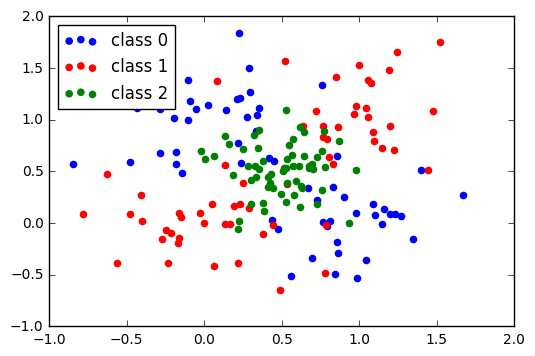

In [7]:
n = 60
n1 = (np.sign(rand.uniform(-1, 1, n))==1).sum()
n2 = (np.sign(rand.uniform(-1, 1, n))==1).sum()
n3 = (np.sign(rand.uniform(-1, 1, n))==1).sum()

X_c1 = np.append(rand.multivariate_normal([0,1], [[0.1, 0], [0, 0.1]], n1), rand.multivariate_normal([1,0], [[0.1, 0], [0, 0.1]], n-n1), axis=0)
X_c2 = np.append(rand.multivariate_normal([0,0], [[0.1, 0], [0, 0.1]], n2), rand.multivariate_normal([1,1], [[0.1, 0], [0, 0.1]], n-n2), axis=0)
X_c3 = np.append(rand.multivariate_normal([0.5,0.5], [[0.05, 0], [0, 0.05]], n3),rand.multivariate_normal([0.5,0.5], [[0.05, 0], [0, 0.05]], n-n3), axis=0)
# create a data matrix of shape 120x3 where colums 0 and 1 are the dimensions and colum 2 being the label
X = np.vstack((X_c1, X_c2,X_c3))
X = X.T
y = np.vstack((np.zeros((n,1)), np.ones((n,1)), np.ones((n,1))+1))

p1 = plt.scatter(X_c1[:,0], X_c1[:,1], color='blue', label='class 0')
p2 = plt.scatter(X_c2[:,0], X_c2[:,1], color='red', label='class 1')
p3 = plt.scatter(X_c3[:,0], X_c3[:,1], color='green', label='class 2')

plt.legend(loc='upper left');
plt.show()

In [8]:
def kNN_3 (X, y, x, k=5):
    """returns the assigned class of x. data is samples x (dimension + labels)"""
    # calculate distance of point x to all other points
    X = np.transpose(X)
    
    D = la.norm(x-X, 2, 1)
    # select k nearest vectors
    knn = np.argsort(D)[:k:]
    
    num = np.empty((3,1))
    
    num[0] = (y[knn] == 0.).sum()
    num[1] = (y[knn] == 1.).sum()
    num[2] = (y[knn] == 2.).sum()

    return np.argmax(num)    

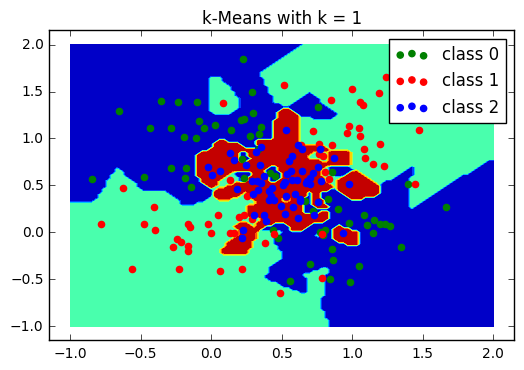

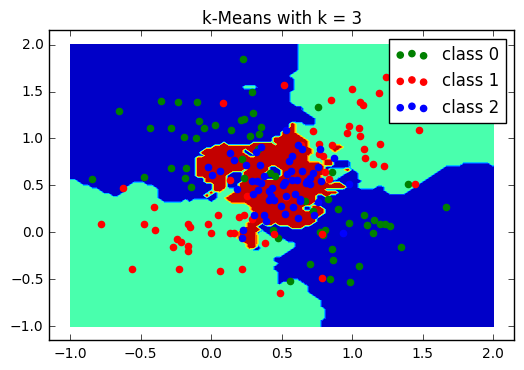

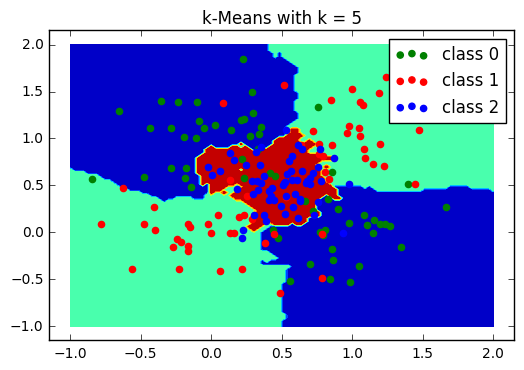

In [9]:
# create a grid for the contour plot
grid_size = 100
ran = np.linspace(-1.0, 2.0, grid_size)
GX, GY = np.meshgrid(ran, ran)
classes = np.zeros((grid_size, grid_size, 3))

K = [1,3,5]

for i, k in enumerate(K):
    # go through grid and compute the assigned class
    for gx in range(grid_size):
        for gy in range(grid_size):
            classes[gx,gy,i] = kNN_3(X, y, [ran[gx], ran[gy]], k)
           
    # plot the assigned classes and train data for the whole grid
    plt.title('k-Means with k = {}'.format(k))
    plt.contourf(GX, GY, classes[:,:,i].T)
    p1 = plt.scatter(X_c1[:,0], X_c1[:,1], color='green', label='class 0')
    p2 = plt.scatter(X_c2[:,0], X_c2[:,1], color='red', label='class 1')
    p3 = plt.scatter(X_c3[:,0], X_c3[:,1], color='blue', label='class 2')
    plt.legend(handles=[p1, p2,p3])
    plt.show()


In [10]:
def parzen_3(X, y, x, sigma):
    factor = -(1 / (2*sigma))
    X= X.T
    D = la.norm(x-X, 2, 1)
    vote = np.exp(factor*D)
    
    
    num = np.empty((3,1))
    num[0] = np.sum(vote[y[:,0]==0])
    num[1] = np.sum(vote[y[:,0]==1])
    num[2] = np.sum(vote[y[:,0]==2])
 
   
    return np.argmax(num)

In [11]:
print y.shape

(180, 1)


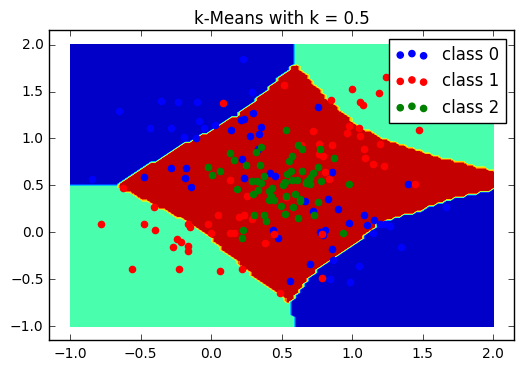

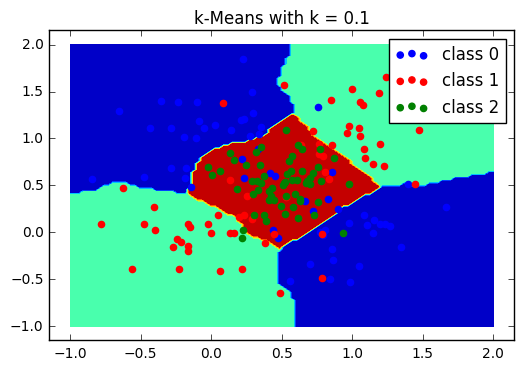

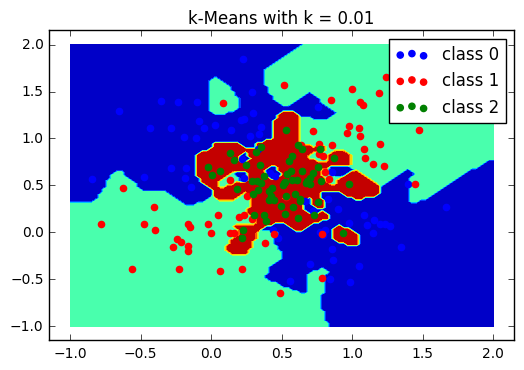

In [12]:
# create a grid for the contour plot
grid_size = 100
ran = np.linspace(-1.0, 2.0, grid_size)
GX, GY = np.meshgrid(ran, ran)
classes = np.zeros((grid_size, grid_size, 3))


K = [0.5,0.1,0.01]
for i, k in enumerate(K):
    # go through grid and compute the assigned class
    for gx in range(grid_size):
        for gy in range(grid_size):
            classes[gx,gy,i] = parzen_3(X, y, [ran[gx], ran[gy]], k)
           
    # plot the assigned classes and train data for the whole grid
    plt.title('k-Means with k = {}'.format(k))
    plt.contourf(GX, GY, classes[:,:,i].T)
    p1 = plt.scatter(X_c1[:,0], X_c1[:,1], color='blue', label='class 0')
    p2 = plt.scatter(X_c2[:,0], X_c2[:,1], color='red', label='class 1')
    p3 = plt.scatter(X_c3[:,0], X_c3[:,1], color='green', label='class 2')
    plt.legend(handles=[p1, p2,p3])
    plt.show()
